In [30]:
# import all the dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
# Read the .CSV file
data_df = pd.read_csv("C:/Users/nikit/Documents/UofT_data_analytics/Project_4_datafile/LLCP2022XPT/cleaned_diabetes_data.csv")
display(data_df)

,Unnamed: 0,STATE,GENDER,INCOME,HEIGHT,WEIGHT,BMI,RACE,AGE,DIABETES,...,HLT_INSURANCE,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,_SMOKER3,DIFFWALK,EDUCATION
0,1,1.0,2.0,3.0,503.0,6804.0,3.0,1.0,13.0,3.0,...,3.0,2.0,8.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
1,2,1.0,2.0,6.0,502.0,6350.0,3.0,1.0,8.0,3.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0
2,4,1.0,2.0,3.0,502.0,5398.0,2.0,1.0,5.0,3.0,...,7.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0
3,6,1.0,2.0,5.0,505.0,6260.0,2.0,2.0,13.0,3.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0
4,7,1.0,2.0,5.0,504.0,7348.0,3.0,1.0,13.0,3.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251839,445126,78.0,1.0,5.0,600.0,10433.0,4.0,1.0,3.0,3.0,...,1.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0
251840,445127,78.0,2.0,1.0,505.0,6985.0,3.0,2.0,1.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0
251841,445128,78.0,2.0,5.0,507.0,8301.0,3.0,2.0,7.0,3.0,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0
251842,445130,78.0,1.0,5.0,600.0,10886.0,4.0,2.0,11.0,3.0,...,3.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,2.0,3.0


In [6]:
data_df = data_df.drop(columns = ["Unnamed: 0"])

In [8]:
# Generate descriptive statistics
data_df.describe()

,STATE,GENDER,INCOME,HEIGHT,WEIGHT,BMI,RACE,AGE,DIABETES,PHYSHLTH,...,HLT_INSURANCE,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,_SMOKER3,DIFFWALK,EDUCATION
count,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,...,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.000000,251844.00000
mean,31.309092,1.512710,4.517507,574.200231,8414.255059,3.043368,2.093621,7.747753,2.738004,58.143307,...,6.464549,1.533795,1.366282,1.945367,1.937981,1.959038,1.649426,3.380740,1.850598,3.14746
std,16.757910,0.499839,1.591946,677.490985,2136.474547,0.826485,2.343618,3.436670,0.718459,38.140108,...,17.639895,0.685951,0.884606,0.227263,0.241190,0.198202,0.477151,0.912984,0.356485,0.91088
min,1.000000,1.000000,1.000000,300.000000,2948.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,19.000000,1.000000,3.000000,504.000000,6804.000000,2.000000,1.000000,5.000000,3.000000,10.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.00000
50%,30.000000,2.000000,5.000000,507.000000,8165.000000,3.000000,1.000000,8.000000,3.000000,88.000000,...,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.00000
75%,46.000000,2.000000,6.000000,510.000000,9525.000000,4.000000,1.000000,11.000000,3.000000,88.000000,...,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.00000
max,78.000000,2.000000,7.000000,9202.000000,27624.000000,4.000000,9.000000,14.000000,4.000000,88.000000,...,88.000000,3.000000,8.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.00000


In [10]:
# retrieve all labels and store in a list
columns_df = list(data_df.columns.values)

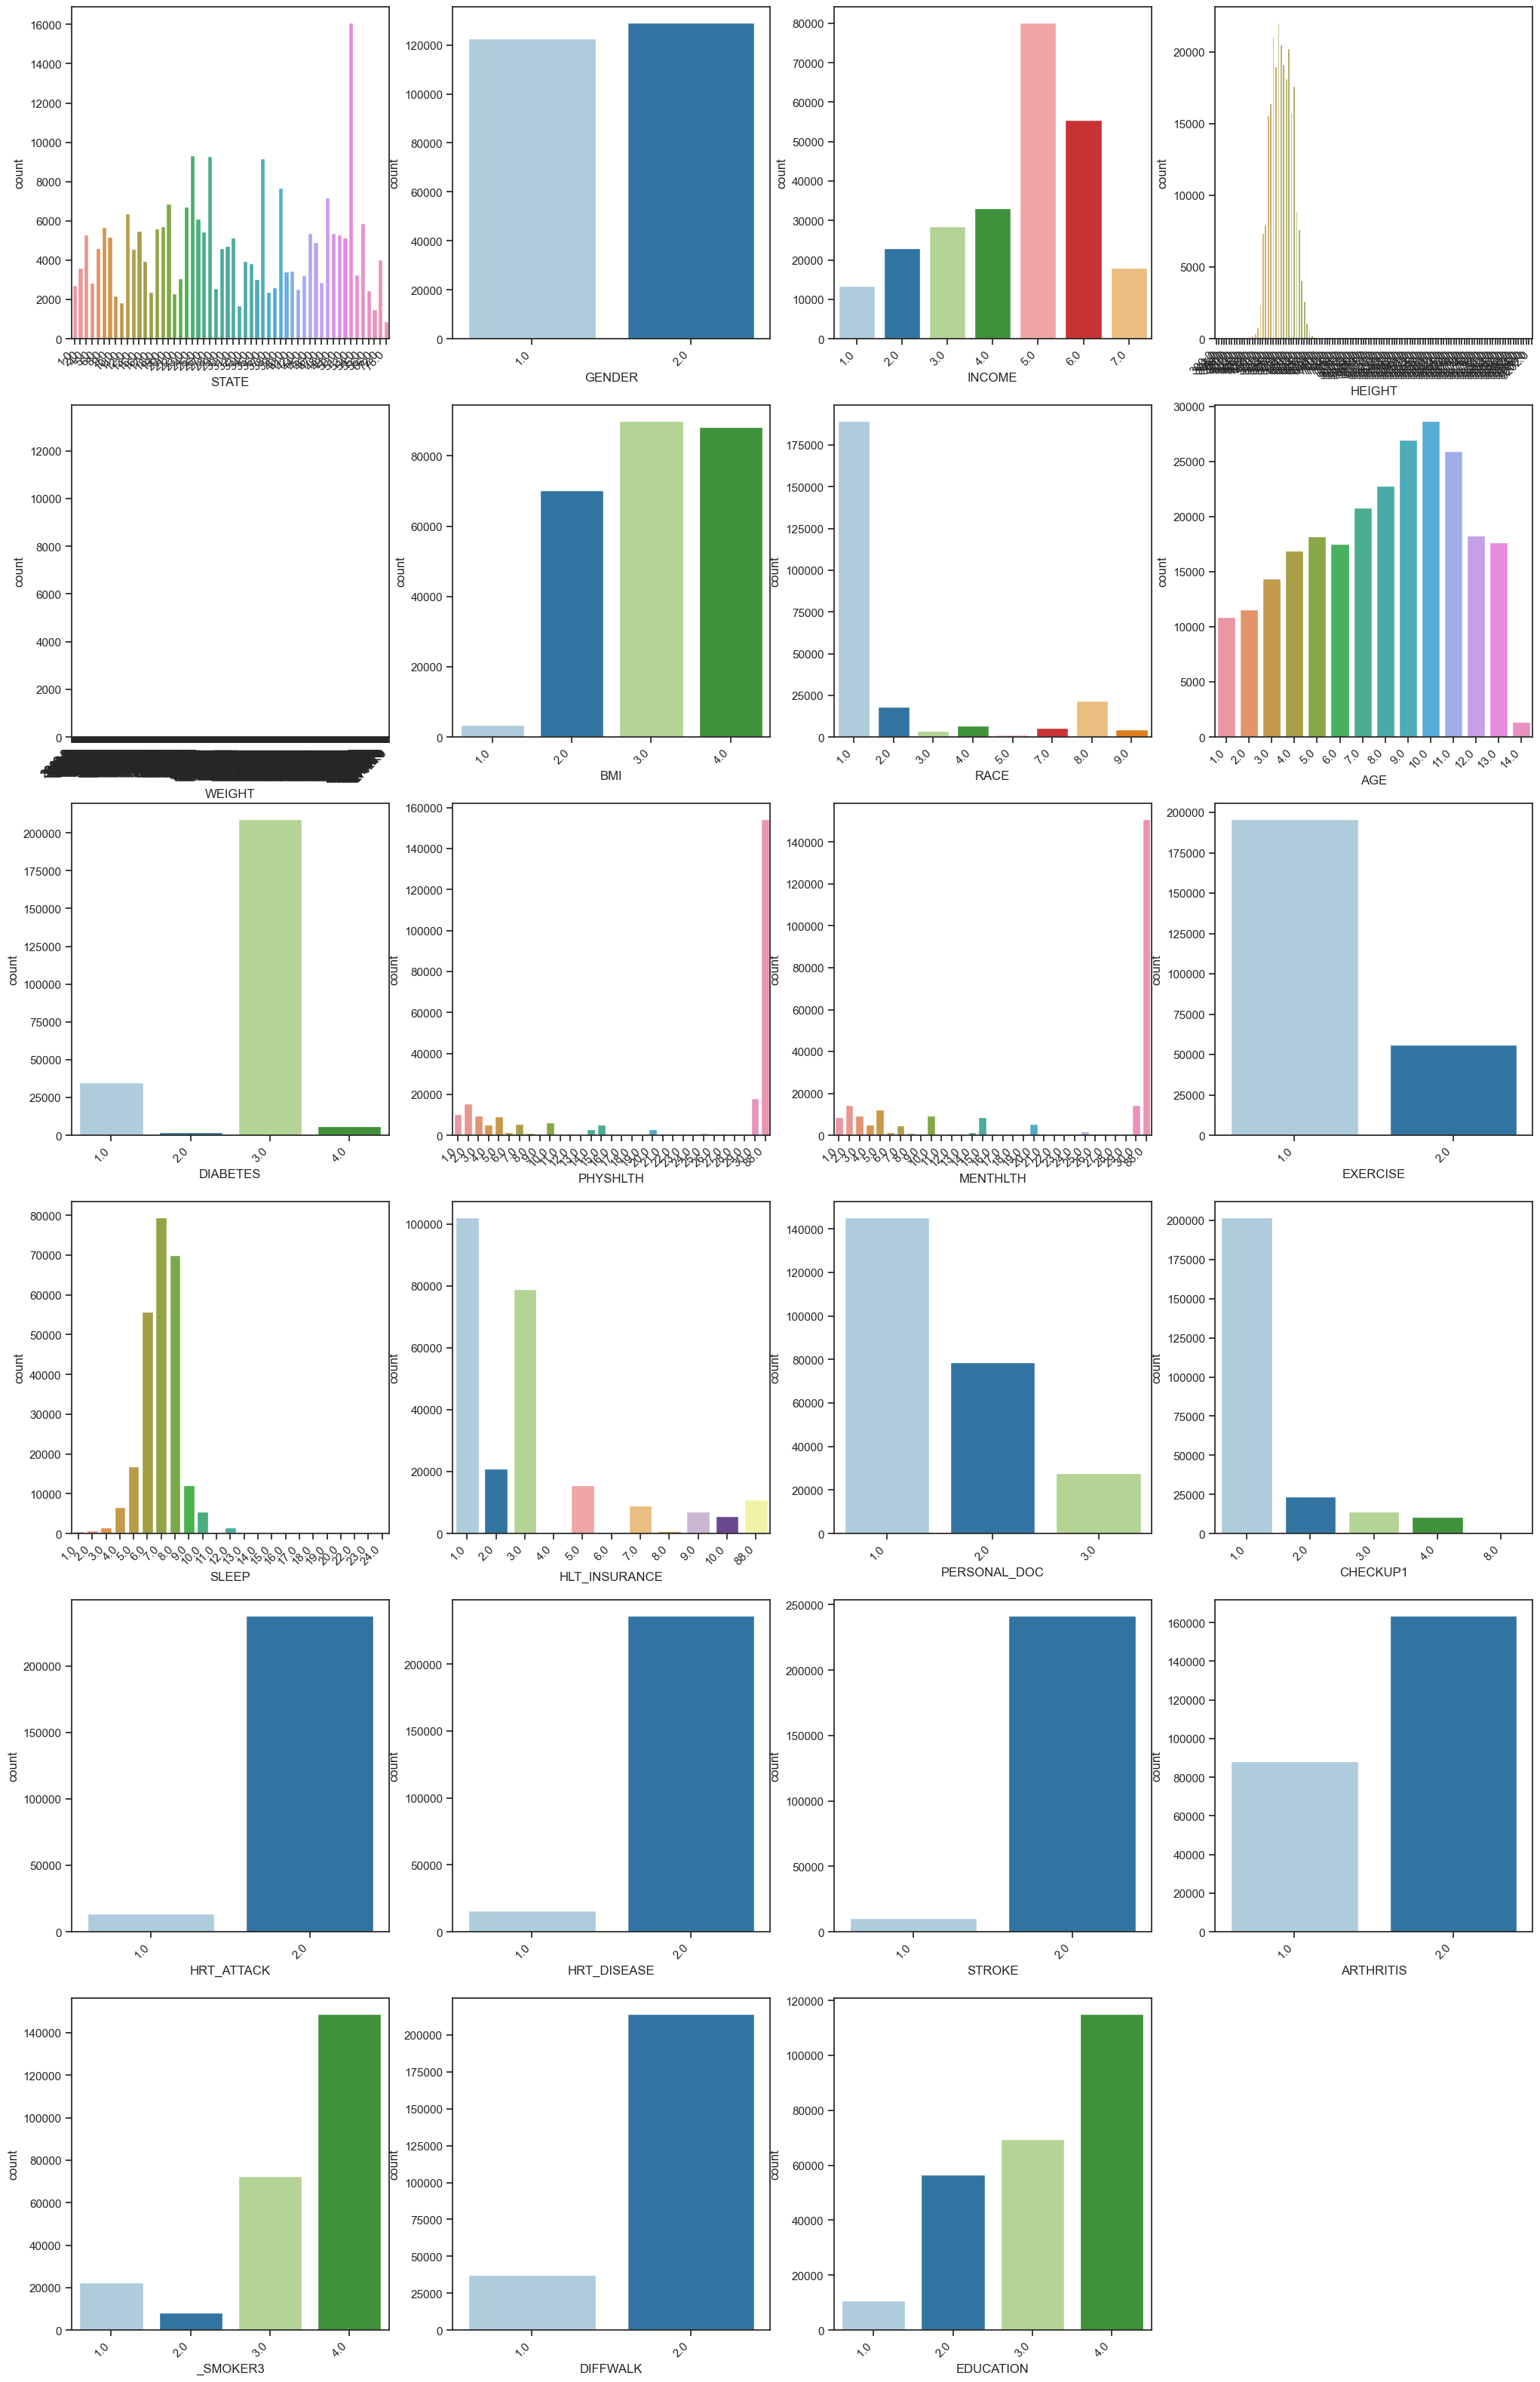

In [12]:
# Univariate visualization of features

def univariate_analysis():
  i = 1
  plt.figure(figsize = (25,40))
  for column in columns_df:
      plt.subplot(6,4,i)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = data_df)#, hue = 'Stroke')#, color='#221C35') 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

univariate_analysis()

In [22]:
# list of numerical features
numeric_features = ["WEIGHT", "HEIGHT", "SLEEP", "AGE"]

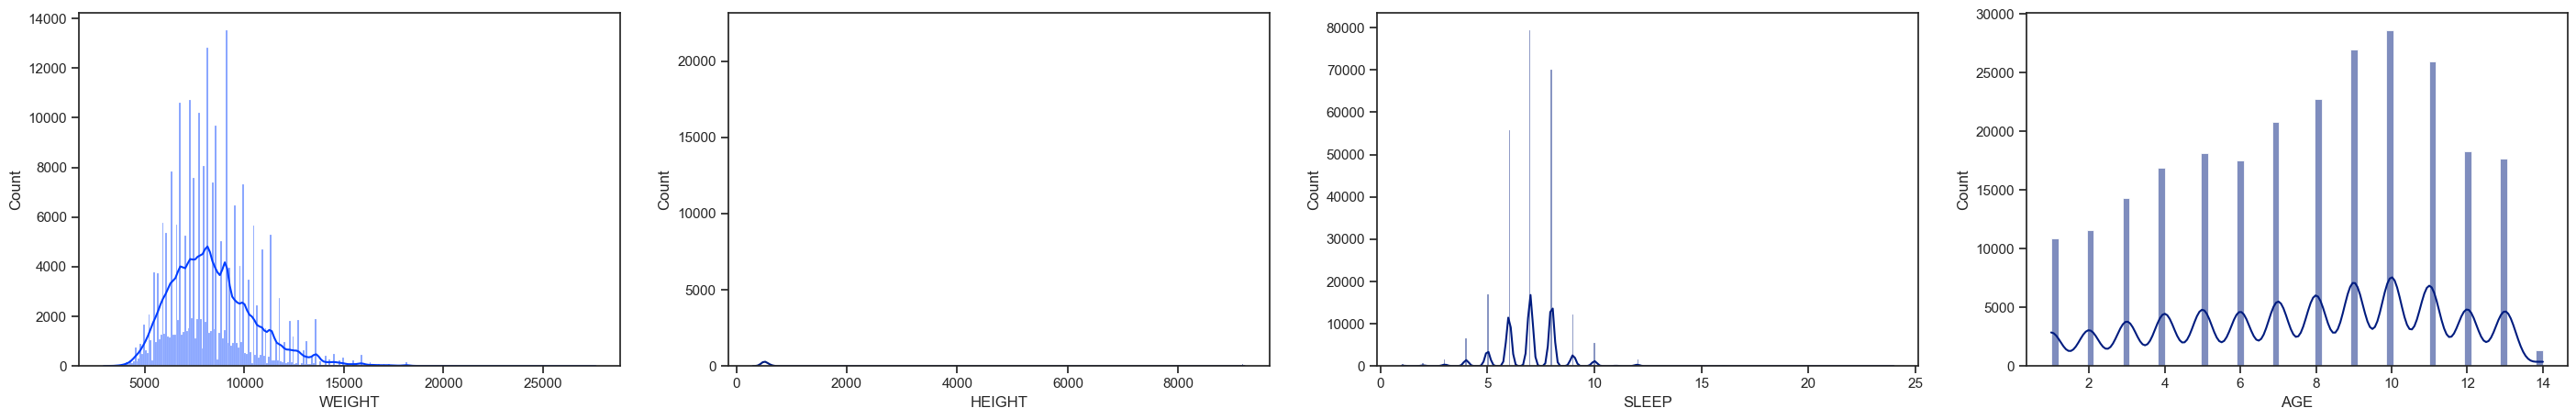

In [23]:
# Univariate visualization of features

def univariate_analysis_hist():
  i=1
  plt.figure(figsize = (35,5))
  for feature in numeric_features:
      plt.subplot(1,4,i)
      sns.set(palette='dark')
      sns.set_style("ticks")
      sns.histplot(data_df[feature],kde=True)
      plt.xlabel(feature)
      plt.ylabel("Count")
      i+=1

univariate_analysis_hist()

In [18]:
#Bivariate analysis for all the columns
#relationship between each variable in the dataset and the target (Diabetes) variable of interest.

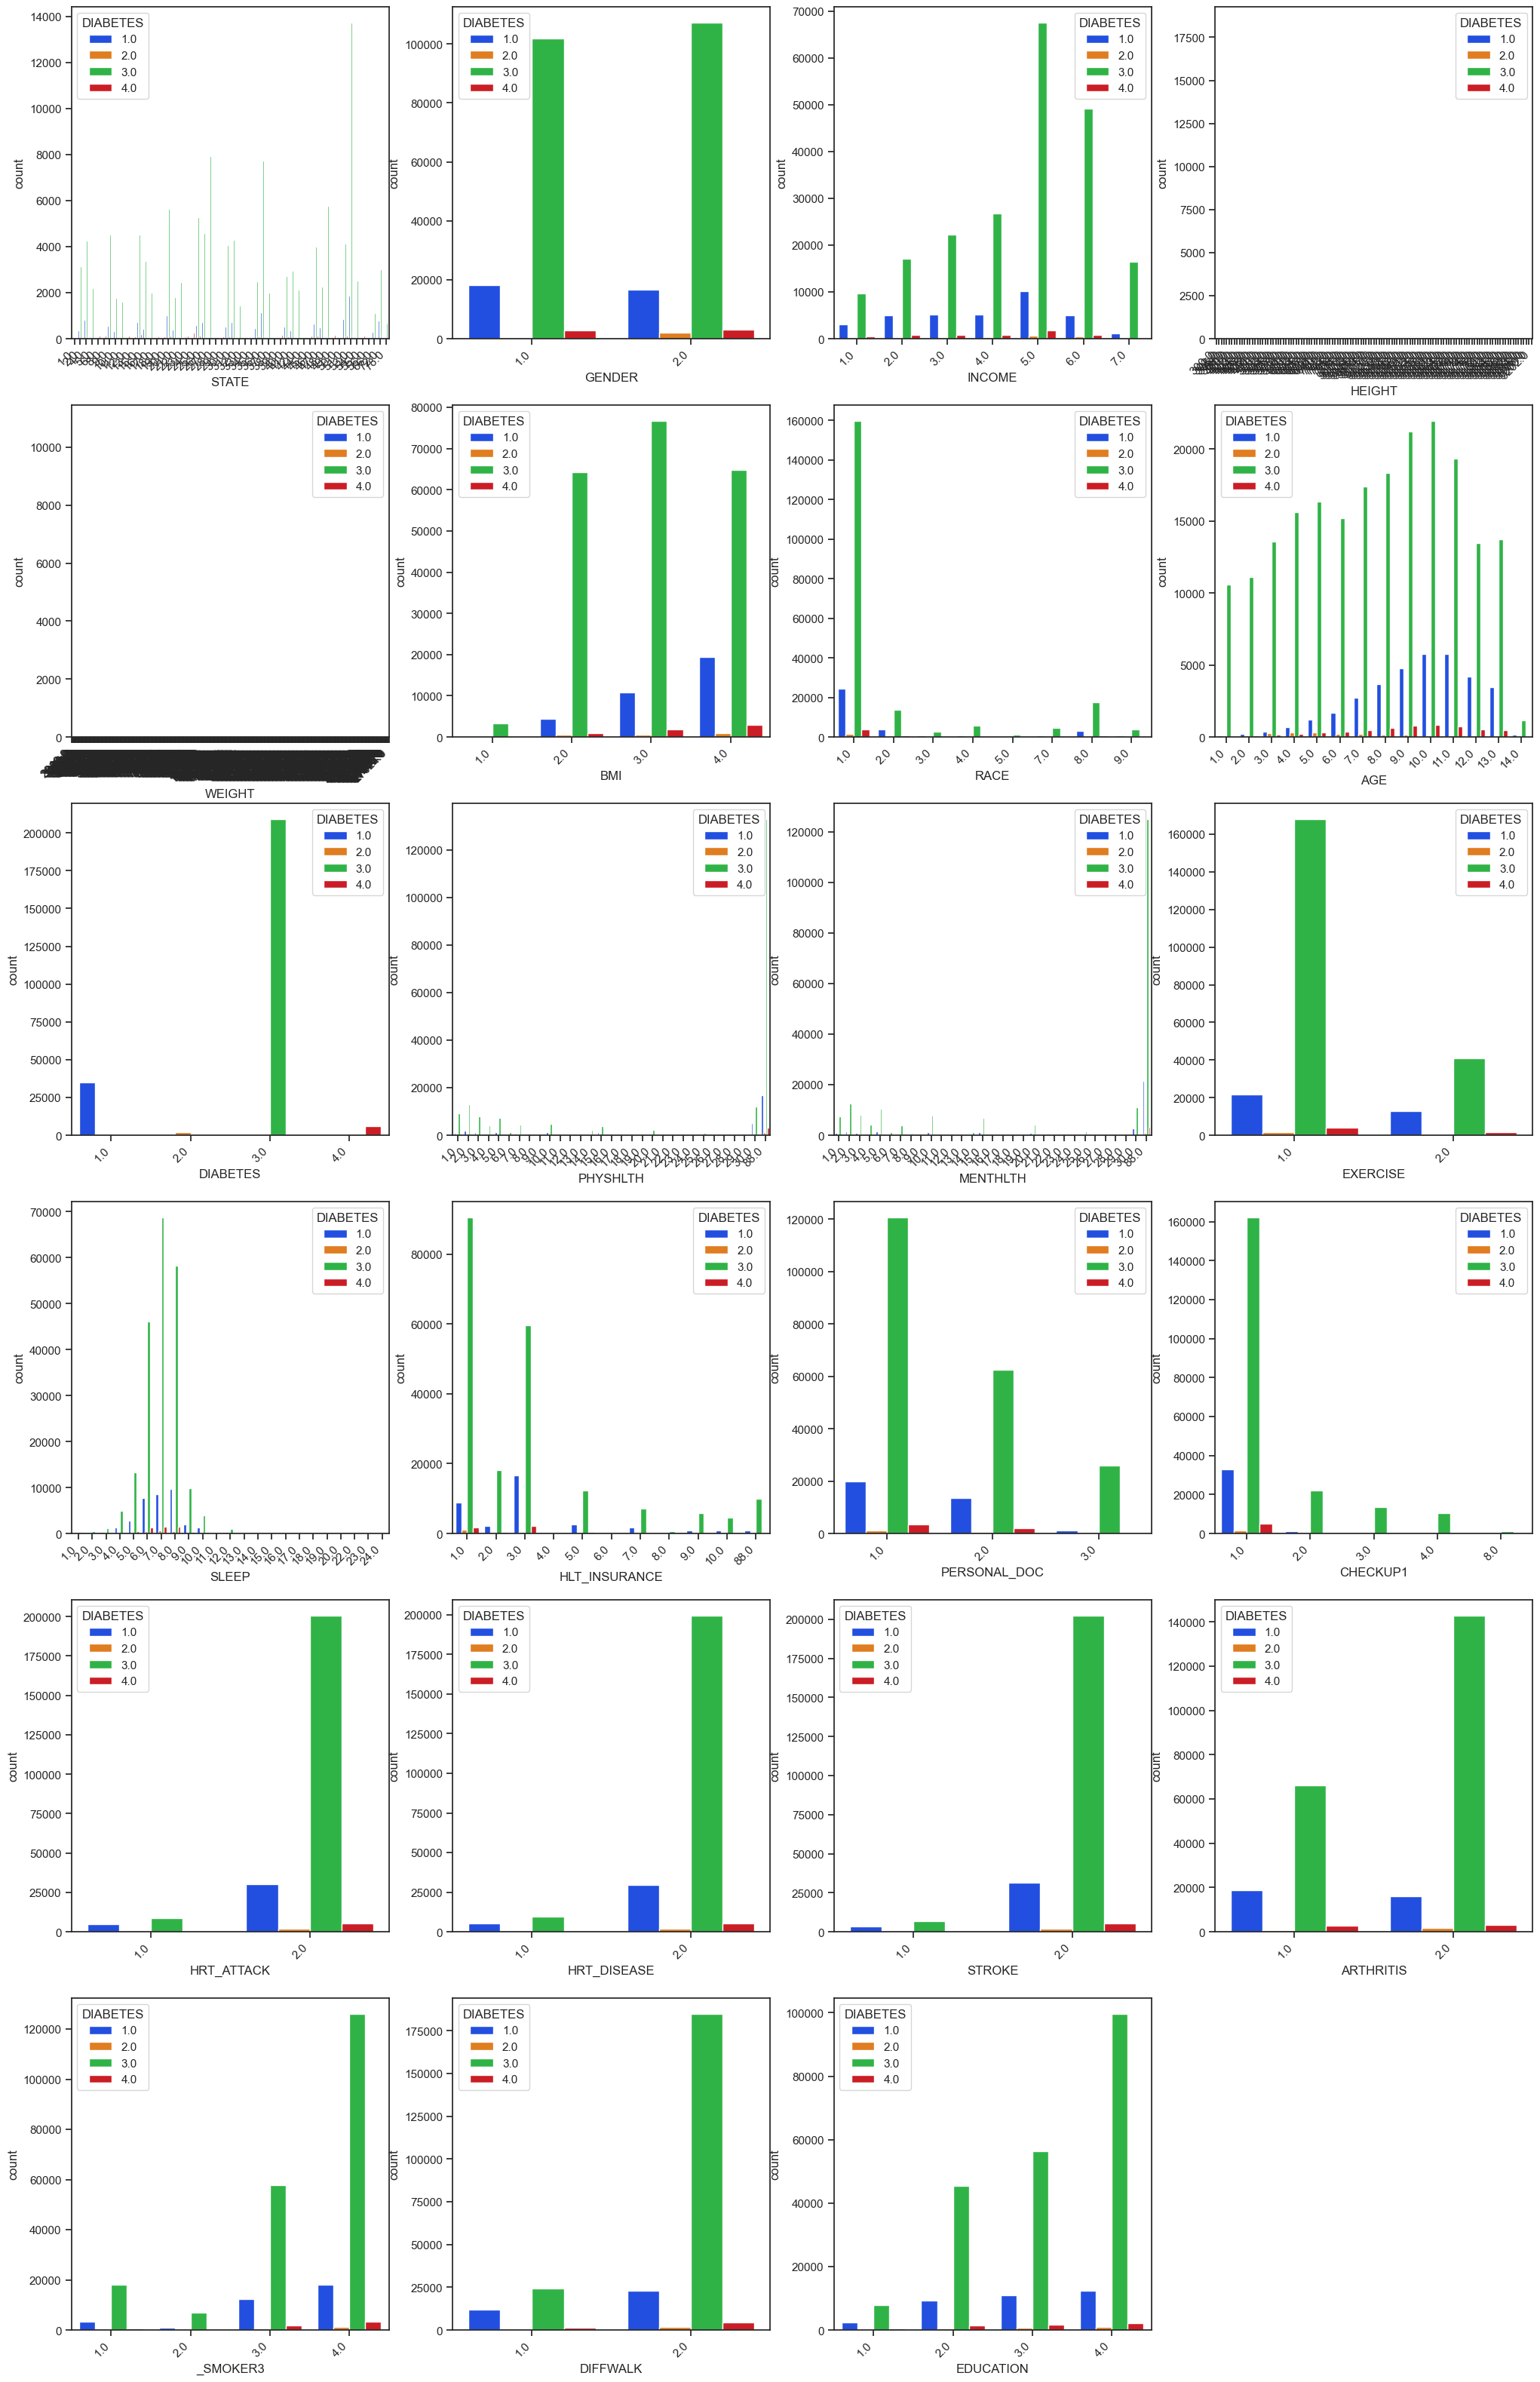

In [20]:
def Bivariate_analysis():
  i = 1
  plt.figure(figsize = (25,40))
  for column in columns_df:
      plt.subplot(6,4,i)
      sns.set(palette='bright')
      sns.set_style("ticks")
      ax = sns.countplot(x = column, data = data_df, hue = 'DIABETES')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
      i +=1

Bivariate_analysis()

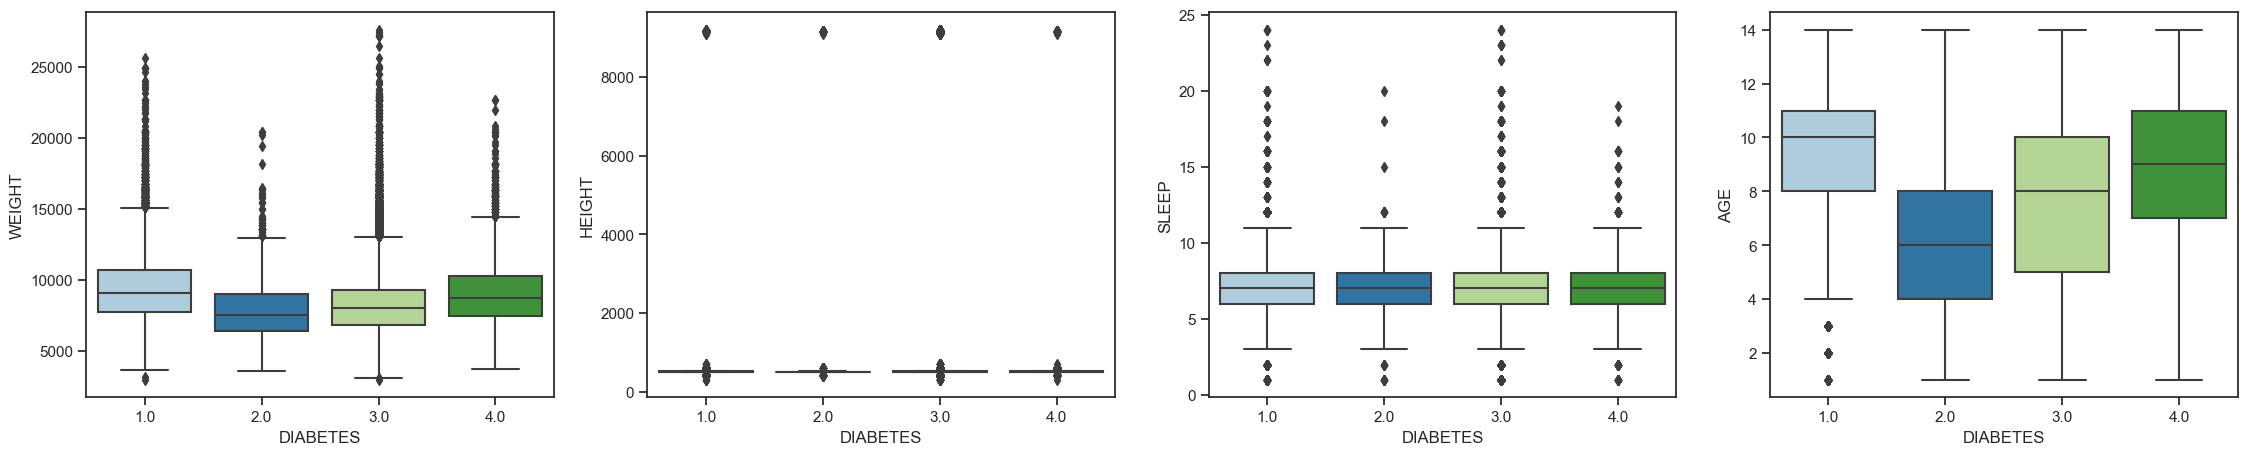

In [24]:
#numeric_features = ["WEIGHT", "HEIGHT", "SLEEP", "AGE"]

def numeric_features_func(f):
  i=1
  plt.figure(figsize=(35,5))
  sns.set(palette='Paired')
  sns.set_style("ticks")
  for feature in numeric_features:
      plt.subplot(1,5,i)
      sns.boxplot(y=data_df[feature], x = data_df[f])
      i+=1

numeric_features_func('DIABETES')

In [ ]:
#sns.pairplot(data_df, hue="DIABETES", height=3)

In [25]:
diab_df = data_df.copy()

In [26]:
#Substituting the value of pre-diabeteic and diabetes during pregnancy as Diabeteic (1 : Diabetic & 0: Not Diabetic)
Diab_dict = {1: 1,
            2: 1,
            3: 0, 
            4: 1,}
diab_df['DIABETIC'] = diab_df['DIABETES'].apply(lambda x: Diab_dict[x])

In [28]:
diab_df.sort_values(["DIABETIC"])

,STATE,GENDER,INCOME,HEIGHT,WEIGHT,BMI,RACE,AGE,DIABETES,PHYSHLTH,...,PERSONAL_DOC,CHECKUP1,HRT_ATTACK,HRT_DISEASE,STROKE,ARTHRITIS,_SMOKER3,DIFFWALK,EDUCATION,DIABETIC
0,1.0,2.0,3.0,503.0,6804.0,3.0,1.0,13.0,3.0,88.0,...,2.0,8.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,0
159511,38.0,2.0,5.0,501.0,5670.0,2.0,1.0,4.0,3.0,5.0,...,2.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,4.0,0
159512,38.0,1.0,6.0,601.0,10206.0,3.0,1.0,3.0,3.0,88.0,...,1.0,1.0,2.0,2.0,2.0,1.0,4.0,2.0,4.0,0
159514,38.0,2.0,6.0,503.0,4990.0,2.0,1.0,4.0,3.0,88.0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0
159515,38.0,2.0,5.0,506.0,8391.0,3.0,1.0,10.0,3.0,88.0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205033,49.0,2.0,2.0,507.0,9072.0,4.0,1.0,7.0,1.0,7.0,...,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,4.0,1
146610,35.0,2.0,5.0,507.0,7711.0,3.0,1.0,13.0,1.0,88.0,...,1.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,4.0,1
146608,35.0,2.0,5.0,502.0,6804.0,3.0,2.0,11.0,4.0,88.0,...,2.0,1.0,2.0,2.0,2.0,1.0,4.0,2.0,4.0,1
205008,49.0,1.0,6.0,509.0,8255.0,3.0,1.0,8.0,1.0,88.0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,1


In [51]:
diab_df = diab_df.drop(columns = ["DIABETES"])

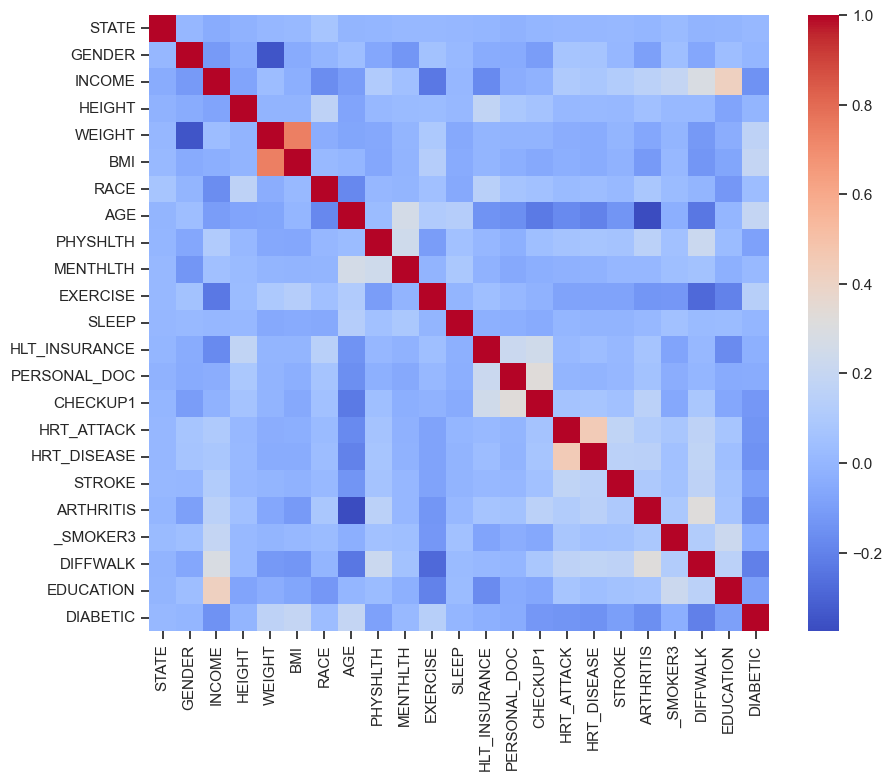

In [52]:
# Calculate correlation matrix
correlation_matrix = diab_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

In [53]:
Y=diab_df["DIABETIC"]
Y.value_counts()

0    209020
1     42824
Name: DIABETIC, dtype: int64

In [54]:
# Split our preprocessed data into our features and target arrays
y=Y.values.reshape(-1, 1)
X=diab_df.copy()
X.drop("DIABETIC", axis=1, inplace=True)
X.head()


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [56]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [57]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [58]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [59]:
# Model Evaluation: Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [60]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,51147,1059
Actual 1,9521,1234


Accuracy Score : 0.8319594669716174
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     52206
           1       0.54      0.11      0.19     10755

    accuracy                           0.83     62961
   macro avg       0.69      0.55      0.55     62961
weighted avg       0.79      0.83      0.78     62961



### Analyze Feature Importance

In [61]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
least_important = sorted(zip(rf_model.feature_importances_, X.columns), reverse= False)
importances_sorted

[(0.13106500063424592, 'WEIGHT'),
 (0.12511280491894247, 'STATE'),
 (0.09391391242545409, 'HEIGHT'),
 (0.08696768146270027, 'AGE'),
 (0.06870898403763831, 'SLEEP'),
 (0.055130948534739356, 'INCOME'),
 (0.05379641449738036, 'PHYSHLTH'),
 (0.05135348083510769, 'MENTHLTH'),
 (0.042988079116270096, 'HLT_INSURANCE'),
 (0.03993463017510508, 'EDUCATION'),
 (0.03618818857844895, '_SMOKER3'),
 (0.030656826400162058, 'RACE'),
 (0.030020578507361218, 'BMI'),
 (0.029503981396401306, 'PERSONAL_DOC'),
 (0.025250662625571216, 'DIFFWALK'),
 (0.019210120040882774, 'ARTHRITIS'),
 (0.0171570551724922, 'CHECKUP1'),
 (0.015581017444612426, 'GENDER'),
 (0.01549876605020016, 'EXERCISE'),
 (0.012591567661524153, 'HRT_DISEASE'),
 (0.01037347281921626, 'HRT_ATTACK'),
 (0.008995826665543681, 'STROKE')]

In [63]:
importances_df = pd.DataFrame(importances_sorted[:20])

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

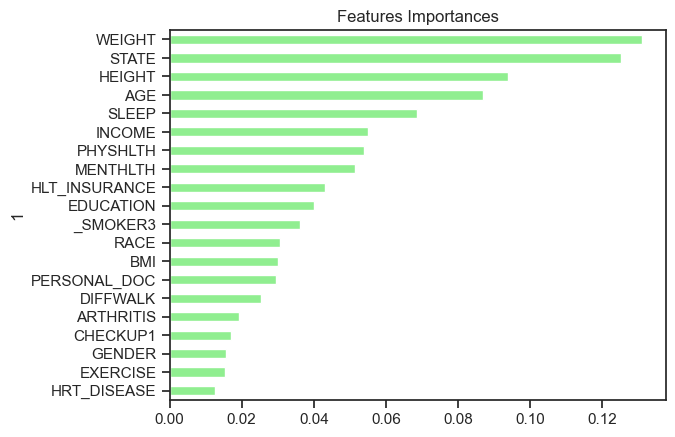

In [64]:
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [68]:
least_important_df = pd.DataFrame(least_important)
least_important_df

,0,1
0,0.008996,STROKE
1,0.010373,HRT_ATTACK
2,0.012592,HRT_DISEASE
3,0.015499,EXERCISE
4,0.015581,GENDER
5,0.017157,CHECKUP1
6,0.019210,ARTHRITIS
7,0.025251,DIFFWALK
8,0.029504,PERSONAL_DOC
9,0.030021,BMI


## Predict a Random Forest with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [80]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_ros_model, y_ros_model = ros.fit_resample(X,y)

In [81]:
# Count the distinct values of the resampled labels data
from collections import Counter

print(Counter(X_ros_model))
print(Counter(y_ros_model))

Counter({'STATE': 1, 'GENDER': 1, 'INCOME': 1, 'HEIGHT': 1, 'WEIGHT': 1, 'BMI': 1, 'RACE': 1, 'AGE': 1, 'PHYSHLTH': 1, 'MENTHLTH': 1, 'EXERCISE': 1, 'SLEEP': 1, 'HLT_INSURANCE': 1, 'PERSONAL_DOC': 1, 'CHECKUP1': 1, 'HRT_ATTACK': 1, 'HRT_DISEASE': 1, 'STROKE': 1, 'ARTHRITIS': 1, '_SMOKER3': 1, 'DIFFWALK': 1, 'EDUCATION': 1})
Counter({0: 209020, 1: 209020})


In [82]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros_model, y_ros_model, random_state=1)

In [83]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_ros)

# Scale the data
X_train_scaled_ros = X_scaler.transform(X_train_ros)
X_test_scaled_ros = X_scaler.transform(X_test_ros)

### Step 2: Use the `Random Forest` classifier and the resampled data to fit the model and make predictions.

In [84]:
# Create the random forest classifier instance
rf_model_ros = RandomForestClassifier(n_estimators=500, random_state=78)

In [85]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model_ros = rf_model_ros.fit(X_train_scaled_ros, y_train_ros.ravel())

In [87]:
# Making predictions using the testing data
predictions_ros = rf_model_ros.predict(X_test_scaled_ros)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [88]:
# Model Evaluation: Calculating the confusion matrix
cm_ros = confusion_matrix(y_test_ros, predictions_ros)
cm_df_ros = pd.DataFrame(
    cm_ros, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_ros = accuracy_score(y_test_ros, predictions_ros)

In [89]:
print("Confusion Matrix")
display(cm_df_ros)
print(f"Accuracy Score : {acc_score_ros}")
print("Classification Report")
print(classification_report(y_test_ros, predictions_ros))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,47657,4739
Actual 1,813,51301


Accuracy Score : 0.9468758970433452
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     52396
           1       0.92      0.98      0.95     52114

    accuracy                           0.95    104510
   macro avg       0.95      0.95      0.95    104510
weighted avg       0.95      0.95      0.95    104510



## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [101]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_classifier = LogisticRegression(solver='lbfgs',random_state=1)

# Fit the model using training data
LR_model = LR_classifier.fit(X_train_scaled_ros, y_train_ros)

In [102]:
# Make a prediction using the testing data
predictions = LR_classifier.predict(X_test_scaled_ros)
results_LR = pd.DataFrame({"Prediction": predictions, "Actual": y_test_ros}).reset_index(drop=True)
results_LR.tail(10)

,Prediction,Actual
104500,0,1
104501,0,0
104502,1,0
104503,1,1
104504,0,1
104505,1,1
104506,0,1
104507,1,1
104508,1,1
104509,1,1


In [103]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Print the balanced_accuracy score of the model
print(f"The balanced accuracy score of the model is: {balanced_accuracy_score(y_test_ros, predictions)}")

The balanced accuracy score of the model is: 0.7010171455554184


In [104]:
# Generate a confusion matrix for the model
cm_LR = confusion_matrix(y_test_ros, predictions)
cm_df = pd.DataFrame(
    cm_LR, index=["Actual_No_Diab(0)", "Actual_Diab(1)"], columns=["Predicted_No_Diab(0)", "Predicted_Diab(1)"]
)
cm_df

,Predicted_No_Diab(0),Predicted_Diab(1)
Actual_No_Diab(0),36117,16279
Actual_Diab(1),14971,37143


In [105]:
target_names = ["No_Diabtes", "Diabetes"]

In [106]:
# Print the classification report for the model
testing_report = classification_report(y_test_ros, predictions, target_names=target_names)
print(testing_report)

              precision    recall  f1-score   support

  No_Diabtes       0.71      0.69      0.70     52396
    Diabetes       0.70      0.71      0.70     52114

    accuracy                           0.70    104510
   macro avg       0.70      0.70      0.70    104510
weighted avg       0.70      0.70      0.70    104510

